<a href="https://colab.research.google.com/github/siddharth-shrotri/siddharthshrotri.github.io/blob/main/Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS539 - Assignment 1**

---

Siddharth Shrotri

**a] Identify and rectify any missing values in the data using appropriate techniques.**

Finding the missing data and filling the data 'NaN' using `'fillna'` command.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/earth_surface_temperatures.csv')

# a. Identify and rectify any missing values in the data using appropriate techniques.
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)

**b] Transform the Years and Month columns into a single column labeled "Date" in the MM-YYYY format, with a datetime64[ns] data type.**

*For example, the year
1848 and month 5 should be unified as a single value, such as 5-1848.*



In [56]:

# b. Transform the Years and Month columns into a single column labeled "Date" in the MM-YYYY format
df['Date'] = pd.to_datetime(df[['Month', 'Years']].assign(DAY=1)).dt.to_period('M')
df.drop(columns=['Month', 'Years'], inplace=True)
print(df.head())


       Country  Temperature  Monthly_variation  Anomaly     Date
0  Afghanistan       19.573             -0.297    2.037  1848-05
1  Afghanistan       23.894             -0.796    2.136  1848-06
2  Afghanistan       26.507             -0.113    1.937  1848-07
3  Afghanistan       24.498             -0.462    1.937  1848-08
4  Afghanistan       19.068             -1.272    1.865  1848-09


**c] Detect and investigate extreme temperature values that might be regarded as
outliers.**

In [57]:
# c. Detect and investigate extreme temperature values that might be regarded as outliers.
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Temperature'] < (Q1 - 1.5 * IQR)) | (df['Temperature'] > (Q3 + 1.5 * IQR))]

# d. Compute summary statistics for temperature, monthly variation, and anomaly values
summary_stats = df.describe()

# e. Identify the countries included in the dataset and calculate their average temperature values.
average_temp_by_country = df.groupby('Country')['Temperature'].mean()

# Compute summary statistics for temperature
summary_stats = df['Temperature'].describe()

# Assuming 'Date' column is in the correct format (monthly period) and calculate monthly variation
monthly_variation = df.groupby('Date')['Temperature'].std()

# Assuming 'Anomaly' is a column that stores the difference between actual temperature and expected temperature
df['Anomaly'] = df['Temperature'] - df['Temperature'].mean().round(2)

# Compute summary statistics for anomalies
anomaly_stats = df['Anomaly'].describe()

# Print results
print("Summary Statistics for Temperature:")
print(summary_stats)

print("\nMonthly Variation in Temperature (Standard Deviation):")
print(monthly_variation)

print("\nSummary Statistics for Anomalies:")
print(anomaly_stats)


Summary Statistics for Temperature:
count    534571.000000
mean         17.059014
std          10.928609
min         -40.349000
25%          10.433000
50%          19.784000
75%          25.774000
max          39.384000
Name: Temperature, dtype: float64

Monthly Variation in Temperature (Standard Deviation):
Date
1743-12     0.000000
1744-01     0.000000
1744-02     0.000000
1744-03     0.000000
1744-04     2.972674
             ...    
2020-08     7.411071
2020-09     8.007017
2020-10     9.233489
2020-11    10.744187
2020-12    12.290258
Freq: M, Name: Temperature, Length: 3325, dtype: float64

Summary Statistics for Anomalies:
count    534571.000000
mean         -0.000986
std          10.928609
min         -57.409000
25%          -6.627000
50%           2.724000
75%           8.714000
max          22.324000
Name: Anomaly, dtype: float64


d] Compute summary statistics for temperature, monthly variation, and anomaly
values, including mean, median, standard deviation, and range. [

In [58]:
# Compute summary statistics for temperature
temperature_stats = {
    'Mean': df['Temperature'].mean(),
    'Median': df['Temperature'].median(),
    'Standard Deviation': df['Temperature'].std(),
    'Range': df['Temperature'].max() - df['Temperature'].min()
}

# Convert the stats into a DataFrame for better readability
temperature_summary = pd.DataFrame(temperature_stats, index=[0])

# Calculate monthly variation (standard deviation for each month)
monthly_variation = df.groupby('Date')['Temperature'].std().reset_index(name='Monthly Std Dev')

# Calculate anomalies if not already calculated
df['Anomaly'] = df['Temperature'] - df['Temperature'].mean()

# Compute summary statistics for anomalies
anomaly_stats = {
    'Mean Anomaly': df['Anomaly'].mean(),
    'Median Anomaly': df['Anomaly'].median(),
    'Standard Deviation Anomaly': df['Anomaly'].std(),
    'Range Anomaly': df['Anomaly'].max() - df['Anomaly'].min()
}

# Convert the anomaly stats into a DataFrame for better readability
anomaly_summary = pd.DataFrame(anomaly_stats, index=[0])

# Print results
print("Temperature Summary Statistics:")
print(temperature_summary)

print("\nMonthly Variation in Temperature (Standard Deviation):")
print(monthly_variation)

print("\nAnomaly Summary Statistics:")
print(anomaly_summary)


Temperature Summary Statistics:
        Mean  Median  Standard Deviation   Range
0  17.059014  19.784           10.928609  79.733

Monthly Variation in Temperature (Standard Deviation):
         Date  Monthly Std Dev
0     1743-12         0.000000
1     1744-01         0.000000
2     1744-02         0.000000
3     1744-03         0.000000
4     1744-04         2.972674
...       ...              ...
3320  2020-08         7.411071
3321  2020-09         8.007017
3322  2020-10         9.233489
3323  2020-11        10.744187
3324  2020-12        12.290258

[3325 rows x 2 columns]

Anomaly Summary Statistics:
   Mean Anomaly  Median Anomaly  Standard Deviation Anomaly  Range Anomaly
0 -1.820449e-15        2.724986                   10.928609         79.733


**e] Identify the countries included in the dataset and calculate their average
temperature values**

In [59]:
# Identify unique countries in the dataset
unique_countries = df['Country'].unique()

# Calculate average temperature by country
average_temp_by_country = df.groupby('Country')['Temperature'].mean().reset_index()

# Rename the columns for clarity
average_temp_by_country.columns = ['Country', 'Average Temperature']

# Print the unique countries
print("Countries Included in the Dataset:")
print(unique_countries)

# Print the average temperature by country
print("\nAverage Temperature by Country:")
print(average_temp_by_country)


Countries Included in the Dataset:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Christmas Island' 'Colombia' 'Comoros' 'Congo'
 'Congo (Democratic Republic of the)' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'Denmark' 'Denmark (Europe)' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States of Micronesia' 'Fiji' 'Finl

**f] Determine the overall trend in global temperatures over the years and visualize this trend using a suitable chart.**

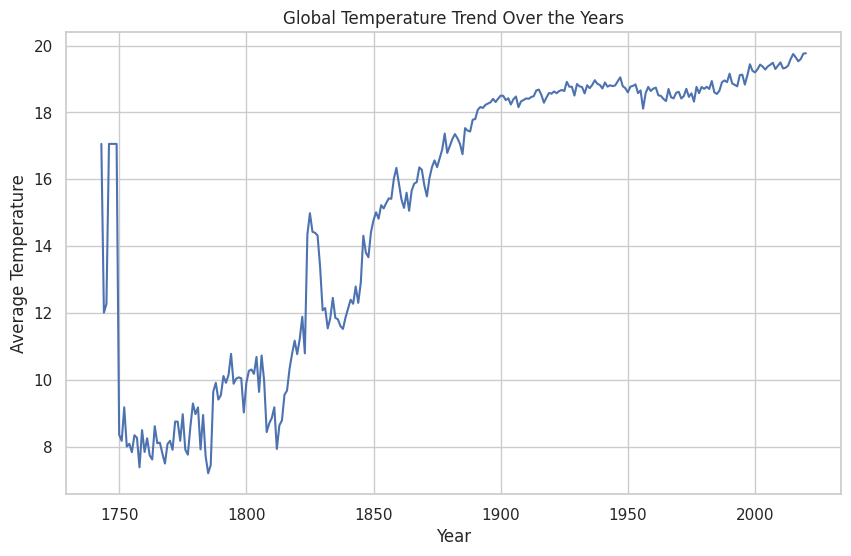

In [60]:
# f. Determine the overall trend in global temperatures over the years and visualize this trend using a suitable chart.
df['Year'] = df['Date'].dt.year
global_temp_trend = df.groupby('Year')['Temperature'].mean()
plt.figure(figsize=(10, 6))
plt.plot(global_temp_trend.index, global_temp_trend.values)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Global Temperature Trend Over the Years')
plt.grid(True)
plt.show()

Monthly Temperature Summary by Country:
            Country  Month_x  Highest Temperature  Month_y  Lowest Temperature
0       Afghanistan  2019-07               28.867  2008-01           -4.588000
1           Albania  2012-07               26.041  1767-01           -2.421000
2           Algeria  2018-07               36.157  1891-01            9.807000
3    American Samoa  2016-02               29.122  1876-10           17.059014
4           Andorra  2003-08               23.806  1766-01           -1.082000
..              ...      ...                  ...      ...                 ...
228  Virgin Islands  2020-08               29.537  1827-06           17.059014
229  Western Sahara  2009-07               33.021  1952-01           14.167000
230           Yemen  2019-07               33.078  1881-08           17.059014
231          Zambia  2016-10               26.418  1907-07           15.343000
232        Zimbabwe  2019-11               26.732  1907-07           13.890000

[233 rows x

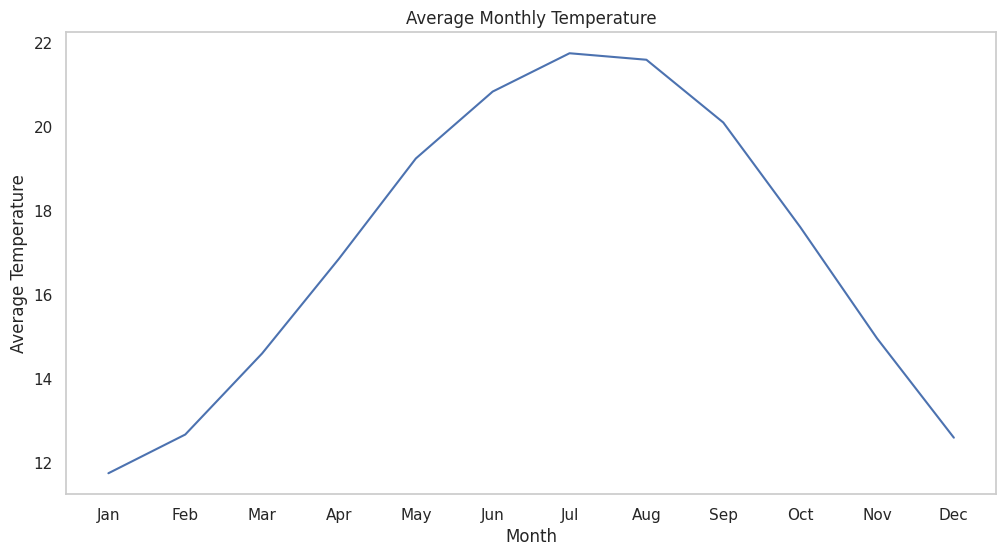

In [61]:
# Ensure 'Date' is in the right format to extract month
df['Month'] = df['Date'].dt.strftime('%Y-%m')  # Format as 'YYYY-MM' for grouping

# Group by Country and Month, calculating max and min temperatures
monthly_temps = df.groupby(['Country', 'Month'])['Temperature'].agg(['max', 'min']).reset_index()

# Find the month with the highest temperature for each country
highest_temps = monthly_temps.loc[monthly_temps.groupby('Country')['max'].idxmax()]
highest_temps = highest_temps.rename(columns={'max': 'Highest Temperature'})

# Find the month with the lowest temperature for each country
lowest_temps = monthly_temps.loc[monthly_temps.groupby('Country')['min'].idxmin()]
lowest_temps = lowest_temps.rename(columns={'min': 'Lowest Temperature'})

# Merge the highest and lowest temperature DataFrames
temperature_summary = pd.merge(highest_temps[['Country', 'Month', 'Highest Temperature']],
                                lowest_temps[['Country', 'Month', 'Lowest Temperature']],
                                on='Country', how='outer')

# Print the resulting table
print("Monthly Temperature Summary by Country:")
print(temperature_summary)

# Ensure the 'Month' is in datetime format for proper plotting
df['Month'] = pd.to_datetime(df['Month'])

# Calculate average temperature by month across all countries
monthly_avg_temp = df.groupby(df['Month'].dt.month)['Temperature'].mean().reset_index()

# Create a line plot to visualize the average monthly temperatures
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Temperature', data=monthly_avg_temp)
plt.title('Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


**h]Explore the variation in temperature anomalies on a monthly basis and identify any months with consistently high or low anomalies across the years.**

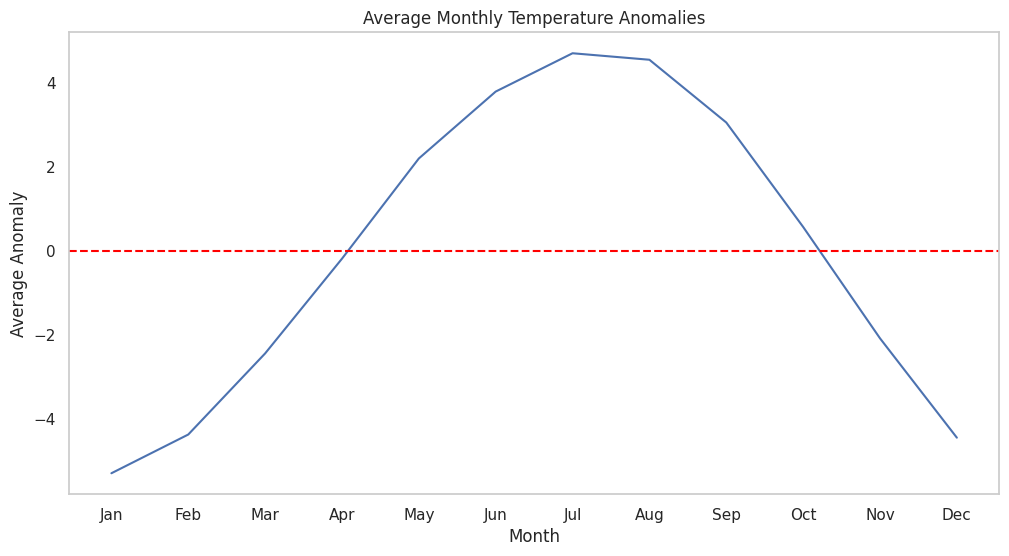

Monthly Anomaly Summary:
    Month  Mean Anomaly    Std Dev
0       1     -5.293727  13.549795
1       2     -4.372639  13.216298
2       3     -2.443704  12.050091
3       4     -0.190112  10.246639
4       5      2.193438   8.548549
5       6      3.785125   7.494395
6       7      4.696582   7.033992
7       8      4.541992   7.062493
8       9      3.049432   7.892725
9      10      0.565729   9.541656
10     11     -2.083982  11.391840
11     12     -4.447458  12.821062

Months with Consistently High Anomalies:
   Month  Mean Anomaly   Std Dev
4      5      2.193438  8.548549
5      6      3.785125  7.494395
6      7      4.696582  7.033992
7      8      4.541992  7.062493
8      9      3.049432  7.892725
9     10      0.565729  9.541656

Months with Consistently Low Anomalies:
    Month  Mean Anomaly    Std Dev
0       1     -5.293727  13.549795
1       2     -4.372639  13.216298
2       3     -2.443704  12.050091
10     11     -2.083982  11.391840
11     12     -4.447458  12.821

In [62]:
# Ensure 'Month' is a datetime format and extract month and year
df['Year'] = df['Date'].dt.year # Extract year from the 'Date' column
df['Month'] = df['Date'].dt.month # Extract month from the 'Date' column

# Group by Month and calculate the average anomaly for each month
monthly_anomalies = df.groupby('Month')['Anomaly'].mean().reset_index()

# Rename columns for clarity
monthly_anomalies.columns = ['Month', 'Average Anomaly']

# Create a line plot for average monthly anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Average Anomaly', data=monthly_anomalies)
plt.title('Average Monthly Temperature Anomalies')
plt.xlabel('Month')
plt.ylabel('Average Anomaly')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero
plt.grid()
plt.show()

# Calculate mean and standard deviation of anomalies for each month
monthly_anomaly_summary = df.groupby('Month')['Anomaly'].agg(['mean', 'std']).reset_index()
monthly_anomaly_summary.columns = ['Month', 'Mean Anomaly', 'Std Dev']

# Define a threshold for consistency (e.g., standard deviation less than 0.5)
threshold = 0.5
consistent_months_high = monthly_anomaly_summary[monthly_anomaly_summary['Mean Anomaly'] > threshold]
consistent_months_low = monthly_anomaly_summary[monthly_anomaly_summary['Mean Anomaly'] < -threshold]

# Print the monthly anomaly summary
print("Monthly Anomaly Summary:")
print(monthly_anomaly_summary)

# Print months with consistently high or low anomalies
print("\nMonths with Consistently High Anomalies:")
print(consistent_months_high)

print("\nMonths with Consistently Low Anomalies:")
print(consistent_months_low)


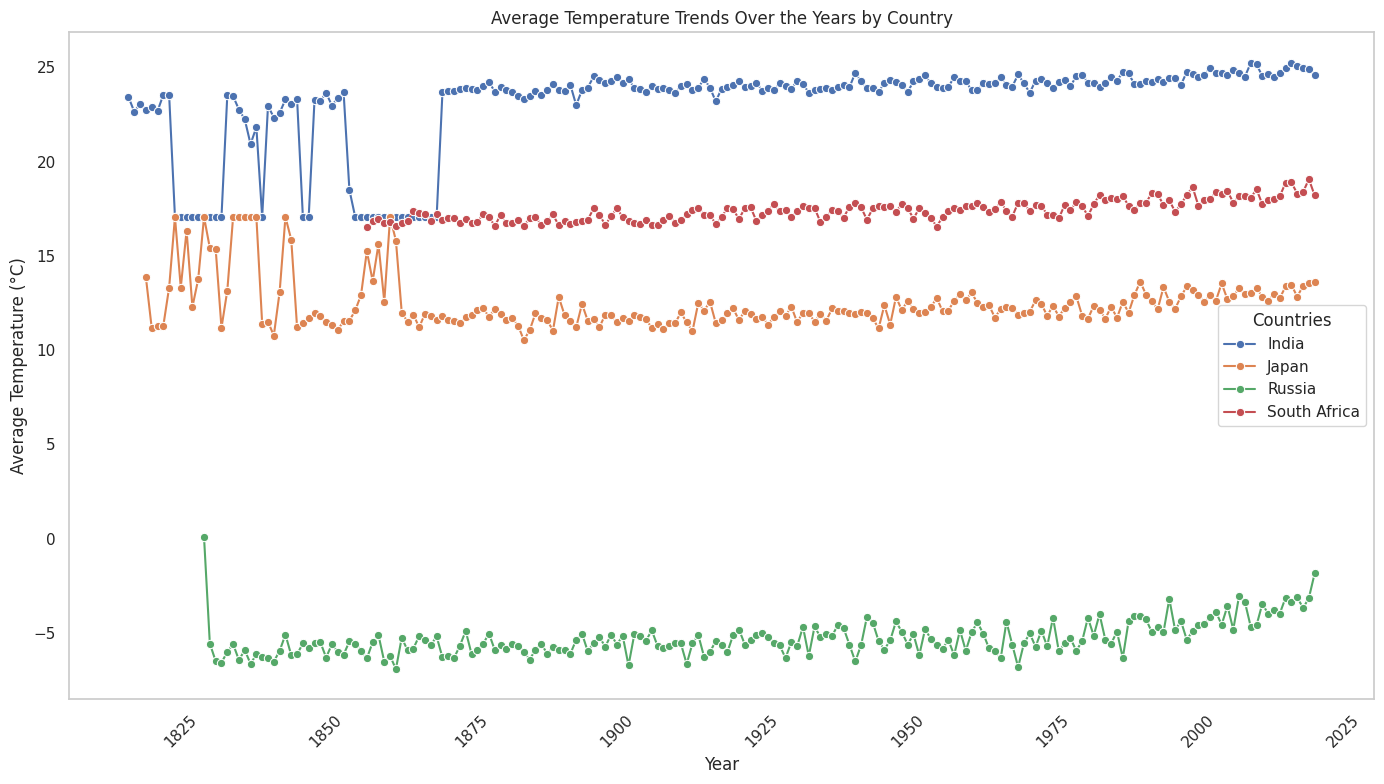

In [63]:
# List of selected countries
selected_countries = ['India', 'Antartica', 'Japan', 'South Africa', 'Russia']

# Filter the dataset for the selected countries
filtered_df = df[df['Country'].isin(selected_countries)]

# Group by Year and Country, then calculate the average temperature
average_temp = filtered_df.groupby(['Year', 'Country'])['Temperature'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a line plot for average temperatures by country
sns.lineplot(data=average_temp, x='Year', y='Temperature', hue='Country', marker='o')

# Title and labels
plt.title('Average Temperature Trends Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Countries')
plt.tight_layout()
plt.show()


Correlation between Temperature and Anomalies: 0.9467071184052039
Correlation between Temperature and Monthly Variation: 0.61760667459163


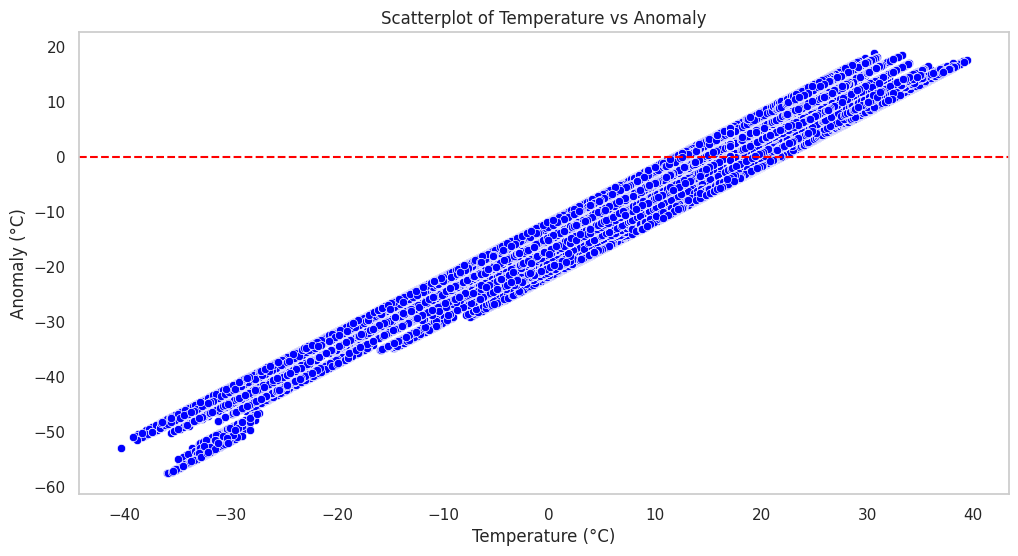

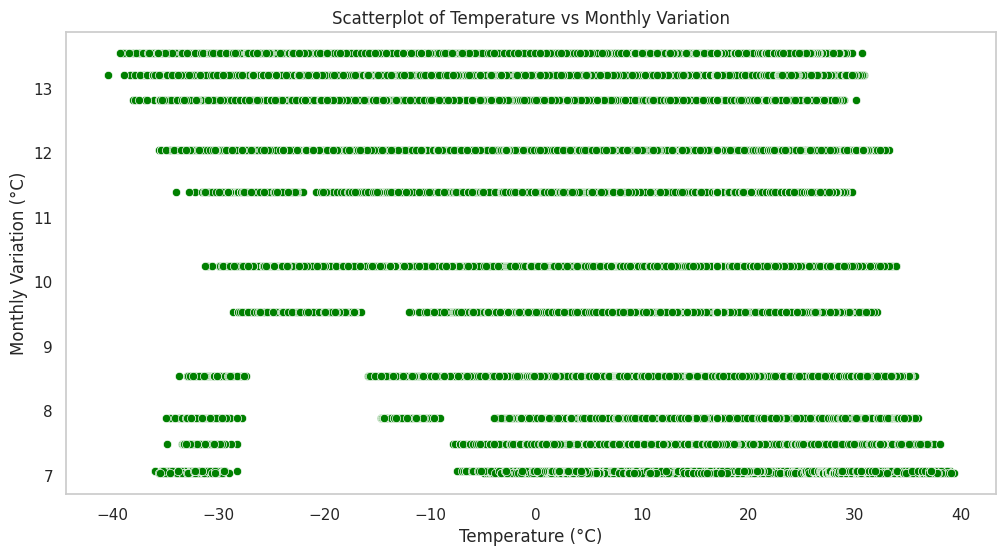

In [64]:
# Calculate monthly variation (standard deviation) of temperature
monthly_variation = df.groupby(df['Date'].dt.month)['Temperature'].std().reset_index() # Access month from the 'Date' column which is a DatetimeIndex
monthly_variation.columns = ['Month', 'Monthly Variation']

# Calculate the monthly average temperature
monthly_avg_temp = df.groupby(df['Date'].dt.month)['Temperature'].mean() # Access month from the 'Date' column which is a DatetimeIndex

# Calculate anomalies
df['Anomaly'] = df['Temperature'] - df['Date'].dt.month.map(monthly_avg_temp) # Access month from the 'Date' column which is a DatetimeIndex

# Calculate the correlation coefficient between temperature and anomalies
correlation_anomaly = df['Temperature'].corr(df['Anomaly'])
print(f"Correlation between Temperature and Anomalies: {correlation_anomaly}")

# Calculate the correlation coefficient between temperature and monthly variation
correlation_variation = df['Temperature'].corr(monthly_variation['Monthly Variation'])
print(f"Correlation between Temperature and Monthly Variation: {correlation_variation}")

# Scatterplot for Temperature vs Anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Anomaly', data=df, color='blue')
plt.title('Scatterplot of Temperature vs Anomaly')
plt.xlabel('Temperature (°C)')
plt.ylabel('Anomaly (°C)')
plt.axhline(0, color='red', linestyle='--')  # Reference line at zero
plt.grid()
plt.show()

# Merge monthly variation into the original DataFrame
monthly_variation['Month'] = monthly_variation['Month'].astype(int)
df['Month'] = df['Date'].dt.month # Access month from the 'Date' column which is a DatetimeIndex
merged_df = df.merge(monthly_variation, on='Month', how='left')

# Scatterplot for Temperature vs Monthly Variation
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Temperature', y='Monthly Variation', data=merged_df, color='green')
plt.title('Scatterplot of Temperature vs Monthly Variation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Monthly Variation (°C)')
plt.grid()
plt.show()

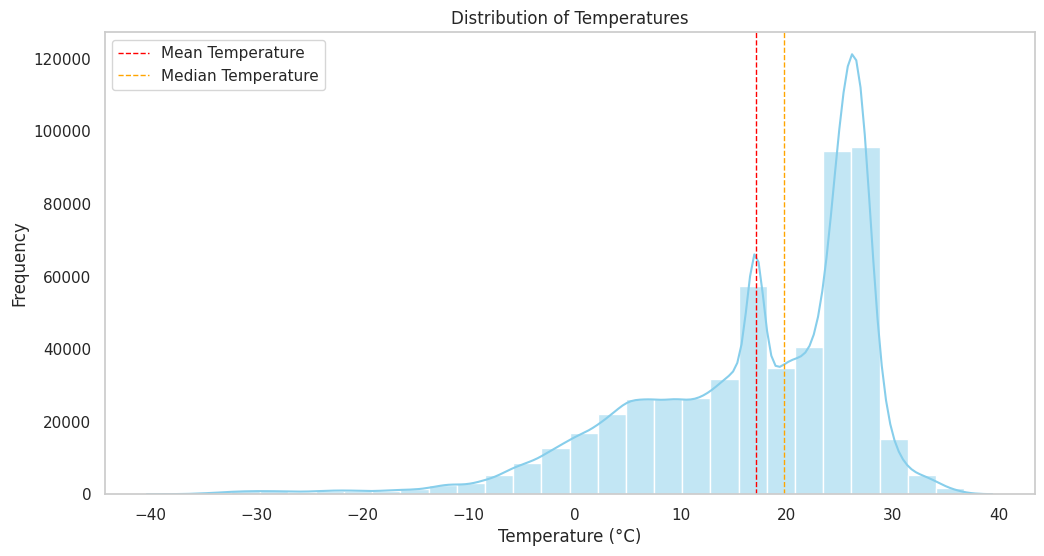

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a histogram of temperature
plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.axvline(df['Temperature'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Temperature')
plt.axvline(df['Temperature'].median(), color='orange', linestyle='dashed', linewidth=1, label='Median Temperature')
plt.legend()
plt.grid()
plt.show()


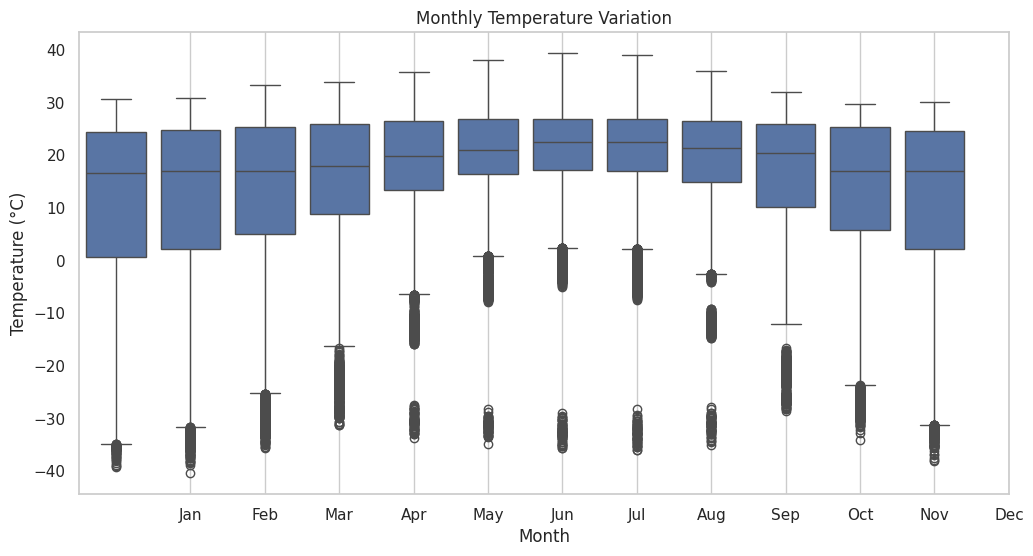

In [68]:
# Create a box plot of temperature by month
plt.figure(figsize=(12, 6))
# Access month from the 'Date' column which is a DatetimeIndex
sns.boxplot(x=df['Date'].dt.month, y='Temperature', data=df)
plt.title('Monthly Temperature Variation')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

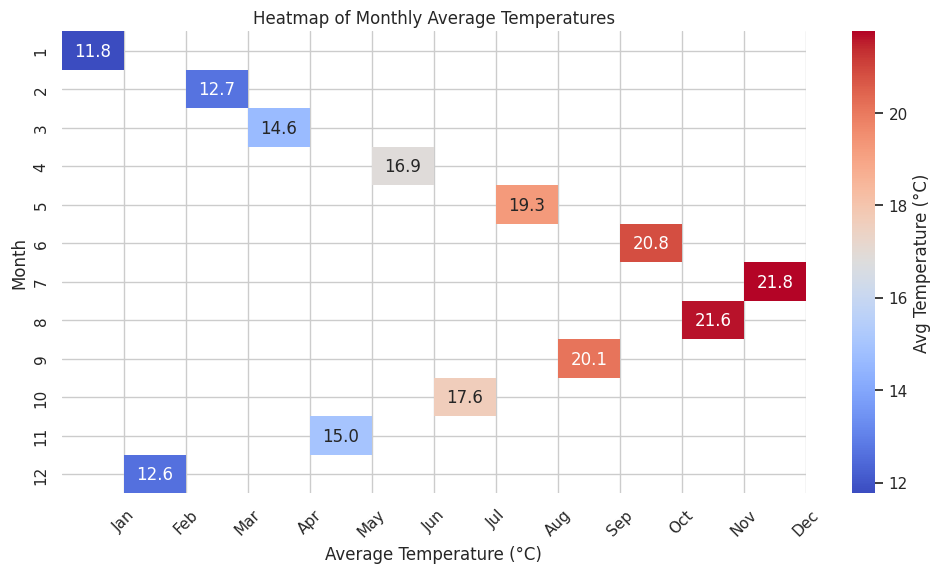

In [67]:
# Calculate the monthly average temperature for the heatmap
# Use the 'Date' column which has the datetime information and extract the month
monthly_avg_temp = df.groupby(df['Date'].dt.month)['Temperature'].mean().reset_index()
monthly_avg_temp.columns = ['Month', 'Average Temperature']

# Create a heatmap of monthly average temperatures
# 'index' is the only positional argument allowed. 'columns' and 'values' must be specified as keyword arguments
heatmap_data = monthly_avg_temp.pivot(index="Month", columns='Average Temperature', values='Average Temperature')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Avg Temperature (°C)'})
plt.title('Heatmap of Monthly Average Temperatures')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()